<a href="https://colab.research.google.com/github/kathelynn/Colab-for-waifu2x-ncnn/blob/master/waifu2x_ncnn_vulkan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# waifu2x-ncnn-vulkan in Google Colab by kathelynn
[ncnn-vulkan](https://github.com/nihui/waifu2x-ncnn-vulkan) is an alternative to [caffe](https://github.com/lltcggie/waifu2x-caffe).

The ipynb for caffe will be available in the near future that utilizes Google Colab's GPU.

This is CPU only but GPU can be enabled with a slight bit of tweaking.

# Initialization
Start the first block of code to initialize waifu2x. Do this by hovering on the code found below, and then press play. Wait for it to finish loading, and then scroll down until you see "Input". You only need to do this once!

In [ ]:
import os
import shutil
import glob
from google.colab import files
from json import load
!apt install libvulkan-dev

!curl -O "https://api.github.com/repos/nihui/waifu2x-ncnn-vulkan/releases/latest"
with open('latest') as latest:
  get_body = load(latest)
for item in get_body['assets']:
  if 'ubuntu' in item['name']:
    name = item['name'].replace('.zip', '')
    url = item['browser_download_url']
    break
!curl -L -O "$url"
!unzip -q -o $name
print('Done!')

# Input
Run this block of code and press the Choose Files button to upload your images.

In [ ]:
shutil.rmtree('/content/input') if os.path.exists('/content/input') else False
os.mkdir('/content/input')
os.chdir('/content/input')
files.upload()

# Output
Run this block of code to process the images you've uploaded. Please take note that the process will take a while depending on the images uploaded. You may wait until the message "Done!" appears.

####Use CPU
Default, recommended for small images less than 1MB at most.

In [ ]:
shutil.rmtree('/content/output') if os.path.exists('/content/output') else False
os.mkdir('/content/output')
os.chdir('/content/output')
noise = int(input('Noise level? ') or 0)
scale = int(input('Scale? ') or 2)
print("Processing... This may take a while!")
!/content/$name/waifu2x-ncnn-vulkan -g -1 -i /content/input -o /content/output -n $noise -s $scale
print("Done!") if glob.glob('*') else print("Failed. Maybe try lowering the values?")
for item in glob.glob('*'):
  files.download(item)

####Use GPU
Coming soon. For now, you may change the `g` attribute in the "Use CPU" section to enable GPU support.



# When not in use
Please terminate the session so that you don't hit the quota too quickly. You can do this by pressing:    
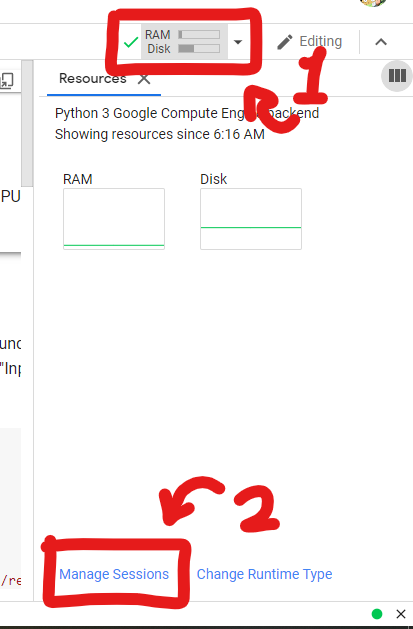
From there, you can see your active sessions.

# Reset
If nothing works properly, run this block of code. You will have to initialize waifu2x again!

In [ ]:
os._exit(00)